In [ ]:
!pip3 install urllib3
import pip    
def install(package):
   pip3.main(['install', package])

install('BeautifulSoup4')

In [64]:
from urllib.request import urlopen #package/library to request for the url 
from bs4 import BeautifulSoup

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
#specify the url and assign it to any variable
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [68]:
## query the website and return the html of that page url to the variable ‘html’


from urllib.request import urlopen 
html = urlopen(url)

In [69]:
# parse the html using beautiful soup and store in variable `soup`
#soup = BeautifulSoup(html, 'html.parser')

soup =BeautifulSoup(html, 'lxml') # lxml is ahtml parser
type(soup)

bs4.BeautifulSoup

In [70]:
#The soup object allows you to extract interesting information, 
#about the website you're scraping such as getting the title of the page as shown below.
title =soup.title
print(title)

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


In [71]:
#You can also get the text of the webpage and quickly print it out to check if it is what you expect.

# Print out the text
text = soup.get_text()
print(soup.text)








2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results






        @media print {
            .noprint {
                display: none;
            }

            .dataTables_filter {
                display: none;
            }
        }
        #individualResults tbody tr {
            cursor: pointer;
        }
        .video-container {
            position: relative;
            padding-bottom: 56.25%; /* 16:9 */
            padding-top: 25px;
            height: 0;
        }
        .video-container iframe {
            position: absolute;
            top: 0;
            left: 0;
            width: 100%;
            height: 100%;
        }
        .dataTables_wrapper .dataTables_paginate {
            float: right;
            text-align: right;
            padding-top: 0.25em;
        }
        .dataTables_wrapper .dataTables_paginate .paginate_button {
                box-sizing: border-box;
                display: inline-block;
                min-width: 

# #You can use the find_all() method of soup to extract useful html tags within a webpage.
#Examples of useful tags include < a > for hyperlinks, < table > for tables, < tr > for table rows, < th > for table headers, and < td > for table cells. The code below shows how to extract all the hyperlinks within the webpage.

In [72]:

soup.find_all('a')

[<a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px">5K</a>,
 <a href="http://hubertiming.com/">Huber Timing Home</a>,
 <a href="#individual">Individual Results</a>,
 <a href="#team">Team Results</a>,
 <a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="#tabs-1" style="font-size: 18px">Results</a>,
 <a name="individual"></a>,
 <a name="team"></a>,
 <a href="http://www.hubertiming.com/"><img height="65" src="/sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>,
 <a href="http://facebook.com/hubertiming/"><img src="/results/FB-f-Logo__blue_50.png"/></a>]

# You can use a for loop and the get('"href") method to extract and print out only hyperlinks.

In [73]:
all_links=soup.find_all('a')
for link in all_links:
    print(link.get('href'))

/results/2017GPTR
http://hubertiming.com/
#individual
#team
mailto:timing@hubertiming.com
#tabs-1
None
None
http://www.hubertiming.com/
http://facebook.com/hubertiming/


# To print out table rows only, pass the 'tr' argument in soup.find_all().

In [76]:
# Print the first 10 rows for sanity check
rows=soup.find_all('tr')
print(row[:10])

TypeError: unhashable type: 'slice'

# The goal of this is to take a table from a webpage and convert it into a dataframe for easier manipulation using Python. 
#To get there, you should get all table rows in list form first and then convert that list into a dataframe.
#Below is a floop that iterates through table rows and prints out the cells of the rows.

In [77]:
for r in rows:
    row_td=r.find_all('td')
print(row_td)

[<td>14TH</td>, <td>INTEL TEAM M</td>, <td>04:43:23</td>, <td>00:58:59 - DANIELLE CASILLAS</td>, <td>01:02:06 - RAMYA MERUVA</td>, <td>01:17:06 - PALLAVI J SHINDE</td>, <td>01:25:11 - NALINI MURARI</td>]


In [78]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>14TH</td>, <td>INTEL TEAM M</td>, <td>04:43:23</td>, <td>00:58:59 - DANIELLE CASILLAS</td>, <td>01:02:06 - RAMYA MERUVA</td>, <td>01:17:06 - PALLAVI J SHINDE</td>, <td>01:25:11 - NALINI MURARI</td>]


bs4.element.ResultSet

In [79]:
#The output above shows that each row is printed with html tags embedded in each row. This is not what you want.
#You can use remove the html tags using Beautiful Soup or regular expressions.

#The easiest way to remove html tags is to use Beautiful Soup, and it takes just one line of code to do this.
#Pass the string of interest into BeautifulSoup() and use the get_text() method to extract the text without html tags.

In [80]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


In [81]:
#below shows how to build a regular expression that finds all the characters inside the < td > html tags and replace them with an empty string for each table row. First, you compile a regular expression by passing a string to match to re.compile().
#The dot, star, and question mark (.*?) will match an opening angle bracket followed by anything and followed by a closing angle bracket. It matches text in a non-greedy fashion, that is, it matches the shortest possible string.
#If you omit the question mark, it will match all the text between the first opening angle bracket and the last closing angle bracket. 
#After compiling a regular expression, you can use the re.sub() method to find all the substrings where the regular expression matches and replace them with an empty string. 
#The full code below generates an empty list, extract text in between html tags for each row, and append it to the assigned list.

In [82]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


str

# convert the list into a dataframe and get a quick view of the first 10 rows using Pandas.

In [83]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,"[Finishers:, 577]"
1,"[Male:, 414]"
2,"[Female:, 163]"
3,[]
4,"[1, 814, JARED WILSON, M, TIGARD, OR, 00:36:21..."
5,"[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, ..."
6,"[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 00:3..."
7,"[4, 623, PAUL MORROW, M, BEAVERTON, OR, 00:38:..."
8,"[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 00..."
9,"[6, 642, JONATHON TRAN, M, PORTLAND, OR, 00:39..."


In [84]:
#The dataframe is not in the format we want. To clean it up, you should split the "0" column into multiple columns at the comma position.
#This is accomplished by using the str.split() method.

In [85]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,[],None,None,None,None,None,None,None,None,None,None,None,None,None
4,[1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,[4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]
9,[6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,]


In [86]:
 #The dataframe has unwanted square brackets surrounding each row.
#You can use the strip() method to remove the opening square bracket on column "0."

In [87]:
import pandas
import numpy
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]
9,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,]


In [88]:
#table is missing table headers. You can use the find_all() method to get the table headers.

In [89]:
col_labels = soup.find_all('th')

In [90]:
#Similar to table rows, you can use Beautiful Soup to extract text in between html tags for table headers.

In [91]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


In [92]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [94]:
df2=df2[0].str.split(',',expand=True)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


In [95]:
df2[0]=df2[0].str.strip('[')
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


In [96]:
df2[13]=df2[13].str.strip(']')
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team


In [97]:
#The two dataframes can be concatenated into one using the concat() method 

In [98]:
frames = [df2, df1]

df3 = pd.concat(frames)
df3.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]


In [115]:
df3[0]=df3[0].str.strip(']')
df3[13]=df3[13].str.strip(']')
df3[1]=df3[1].str.strip(']')
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
0,Finishers:,577,None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414,None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163,None,None,None,None,None,None,None,None,None,None,None,None
3,,None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F


In [116]:
# to assign the first row to be the table header.
df4 = df3.rename(columns=df3.iloc[0])
df4.head(10)

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
0,Finishers:,577,None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414,None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163,None,None,None,None,None,None,None,None,None,None,None,None
3,,None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F


In [117]:
#info about the data
df4.info()
df4.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 595
Data columns (total 14 columns):
Place               597 non-null object
 Bib                596 non-null object
 Name               593 non-null object
 Gender             593 non-null object
 City               593 non-null object
 State              593 non-null object
 Chip Time          593 non-null object
 Chip Pace          578 non-null object
 Gender Place       578 non-null object
 Age Group          578 non-null object
 Age Group Place    578 non-null object
 Time to Start      578 non-null object
 Gun Time           578 non-null object
 Team               578 non-null object
dtypes: object(14)
memory usage: 37.3+ KB


(597, 14)

In [119]:
#The table has 597 rows and 14 columns. You can drop all rows with any missing values.

df5 = df4.dropna(axis=0, how='any')
df5

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F
9,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,
10,7,144,GEORGE TOTONCHY,M,PORTLAND,OR,00:40:04,06:27,7 of 414,M 36-45,3 of 152,00:00:13,00:40:17,
11,8,395,BENJAMIN C CHAFFIN,M,PORTLAND,OR,00:40:05,06:27,8 of 414,M 36-45,4 of 152,00:00:04,00:40:09,
12,9,7,BRANDON THOMAS,M,,,00:40:17,06:29,9 of 414,M 26-35,3 of 154,00:00:07,00:40:24,COLUMBIA TEAM B


In [120]:
 #the table header is replicated as the first row in df5. It can be dropped using the following line of code.
df6 = df5.drop(df5.index[0])
df6.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F


In [108]:
#perform more data cleaning by renaming the '[Place' and ' Team]' columns. Python is very picky about space. Make sure you include space after the quotation mark in ' Team]'.

#df7.rename(columns={'[Place': 'Place'},inplace=True)
#df7.rename(columns={' Team]': 'Team'},inplace=True)
#df7.head()

In [122]:
#df6['Team'] = df6['Team'].str.strip(']')
#df6.head()
df6[' Team'] = df6[' Team'].str.strip(']')
df6.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F


In [123]:
df6[' Team']

4                      
5          INTEL TEAM F
6                      
7                      
8          INTEL TEAM F
9                      
10                     
11                     
12      COLUMBIA TEAM B
13      COLUMBIA TEAM A
14                DTNA1
15                DTNA2
16                     
17                     
18                     
19         INTEL TEAM K
20      COLUMBIA TEAM A
21                     
22                     
23                     
24         INTEL TEAM K
25                     
26                 FXG1
27                     
28                     
29                     
30                     
31                     
32                     
33         INTEL TEAM K
             ...       
551                    
552                    
553                    
554                    
555                    
556                    
557        INTEL TEAM M
558                    
559                    
560                    
561             

In [124]:
#need to convert the column "Chip Time" into just minutes. One way to do this is to convert the column to a list first for manipulation.

In [126]:
time_list = df6[' Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
#print(time_mins)

In [127]:
#The next step is to convert the list back into a dataframe and make a new column ("Runner_mins") 
df6['Runner_mins'] = time_mins
df6.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,,36.350000
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F,36.700000
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,,37.733333
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,,38.566667
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F,39.350000


In [128]:
#The code below shows how to calculate statistics for numeric columns only in the dataframe.
df6.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


In [129]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x1a082ab0>],
 <a list of 1 Text xticklabel objects>)

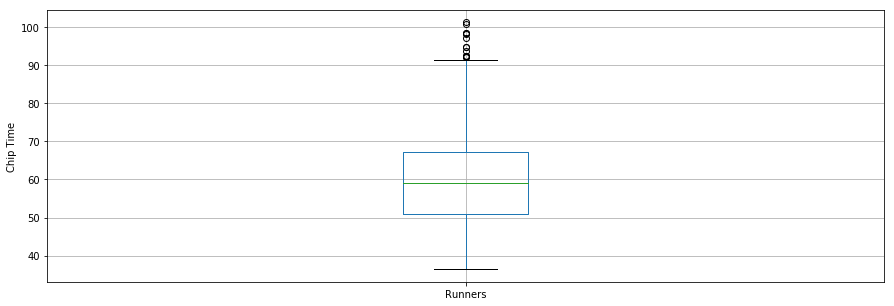

In [130]:
df6.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

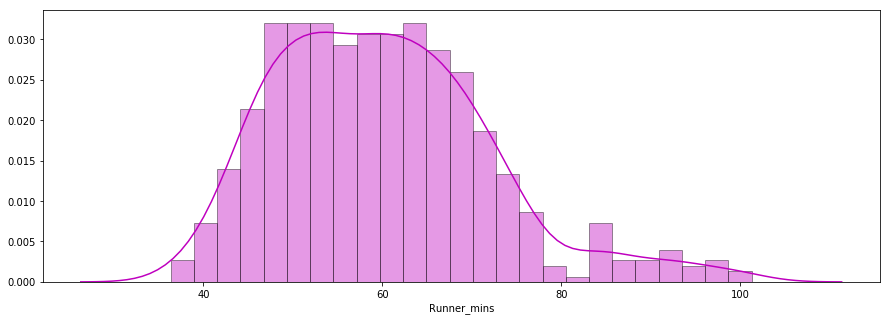

In [131]:
x = df6['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

c:\users\rh\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


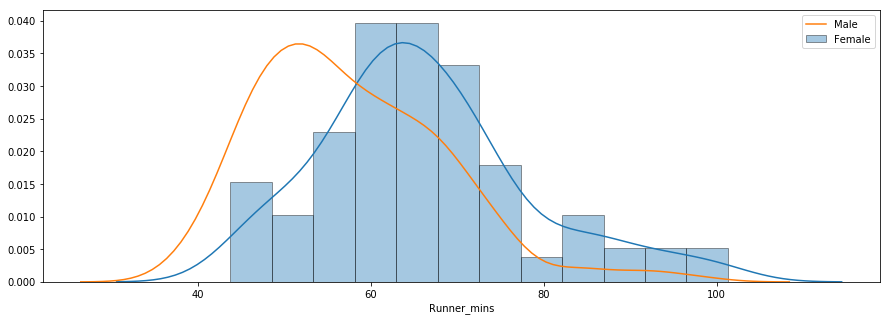

In [135]:
f_fuko = df6.loc[df6[' Gender']==' F']['Runner_mins']
m_fuko = df6.loc[df6[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [136]:
g_stats = df6.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


Text(0.5, 0.98, '')

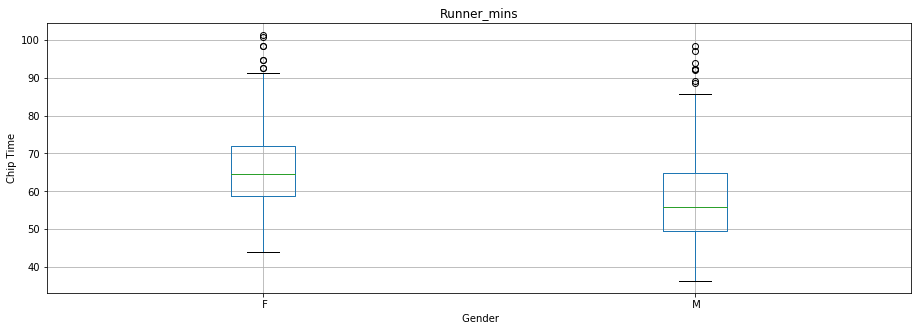

In [137]:
df6.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")

In [1]:
!git init

Reinitialized existing Git repository in C:/Users/rh/.git/


In [2]:
!git config --global user.name "Harshithargowda"

In [3]:
!git config --global user.email "harshithar093@gmail.com"

In [4]:
!git init

Reinitialized existing Git repository in C:/Users/rh/.git/


In [5]:
!git status


On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.3T/
	.IdeaIC2018.1/
	.PyCharmCE2018.1/
	.VirtualBox/
	.babel.json
	.bash_history
	.cache/
	.cisco/
	.config/
	.csp_ovftool_settings.js
	.dbshell
	.dotnet/
	.gitconfig
	.ipynb_checkpoints/
	.ipython/
	.jupyter/
	.matplotlib/
	.mongorc.js
	.node_repl_history
	.swt/
	.vscode/
	.yarnrc
	.zenmap/
	AppData/
	Contacts/
	Desktop/
	Documents.ipynb
	Documents/
	Downloads/
	Favorites/
	IntelGraphicsProfiles/
	Links/
	Music/
	NTUSER.DAT
	NTUSER.DAT{bc3c9c63-a3c8-11e7-8a4e-00155d601bc9}.TxR.0.regtrans-ms
	NTUSER.DAT{bc3c9c63-a3c8-11e7-8a4e-00155d601bc9}.TxR.1.regtrans-ms
	NTUSER.DAT{bc3c9c63-a3c8-11e7-8a4e-00155d601bc9}.TxR.2.regtrans-ms
	NTUSER.DAT{bc3c9c63-a3c8-11e7-8a4e-00155d601bc9}.TxR.blf
	NTUSER.DAT{bc3c9c64-a3c8-11e7-8a4e-00155d601bc9}.TM.blf
	NTUSER.DAT{bc3c9c64-a3c8-11e7-8a4e-00155d601bc9}.TMContainer00000000000000000001.regtrans-ms
	NTUSER.DAT{bc3c9c64-a3c8-11e7-8a4e-001

In [6]:
!git add webscraping-1.ipynb

The file will have its original line endings in your working directory.


In [7]:
!git commit -m "webscraping sample-1"

[master (root-commit) cc5cd01] webscraping sample-1
 1 file changed, 15573 insertions(+)
 create mode 100644 webscraping-1.ipynb


In [8]:
!git push

fatal: No configured push destination.
Either specify the URL from the command-line or configure a remote repository using

    git remote add <name> <url>

and then push using the remote name

    git push <name>



In [12]:
!git remote add -ft  Web-scraping https://github.com/Harshithargowda/Webscraping-demo

usage: git remote add [<options>] <name> <url>

    -f, --fetch           fetch the remote branches
    --tags                import all tags and associated objects when fetching
                          or do not fetch any tag at all (--no-tags)
    -t, --track <branch>  branch(es) to track
    -m, --master <branch>
                          master branch
    --mirror[=<push|fetch>]
                          set up remote as a mirror to push to or fetch from

